Write a program to demonstrate the working of the decision tree based on ID3 algorithm. Use an appropritate dataset for building the decision tree and apply this knowledge to classifiy a new example.

In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# reading the dataset
df = pd.read_csv(r"cancer.csv")
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1
679,0,2,1,1,1,2,1,1,1,1
680,1,5,10,10,3,7,3,8,10,2
681,1,4,8,6,4,3,4,10,6,1


In [64]:
df.columns

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

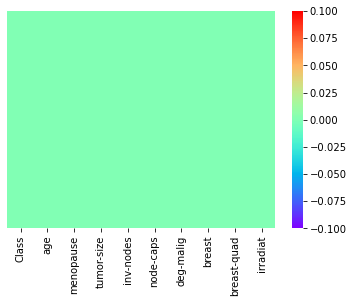

In [65]:
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)
plt.show()

Contains no null values

In [66]:
# separating our training and testing samples
col = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat']
X = df[col]
y = df['Class']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
clf = tree.DecisionTreeClassifier(criterion='entropy',splitter='best')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0], dtype=int64)

In [70]:
accuracy_score(y_test,y_pred)

0.9708029197080292

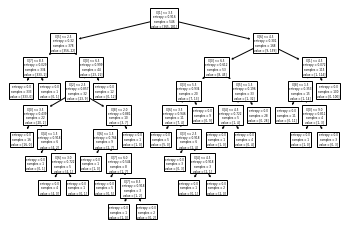

In [71]:
tree.plot_tree(clf)
plt.savefig("output.jpg")
plt.show()